In [2]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"

In [4]:


def func1(x,t,i, M, power = 3):


    if i == M-1:
        base = (x <= t[i+1]) & (x >= t[i])
    else:
        base = (x < t[i+1]) & (x >= t[i])

    if i < M - 1:
        x < t[i+1]
        x >= t[i]
        
        f1_1 =  (x - t[i]) * base
        f1_1 = f1_1**power
        f1_1 = - f1_1 / f1_1.max() * 0.5


        f1_2 = (t[i+2] - x) * ((x < t[i+2]) & (x >= t[i+1]))
        f1_2 = f1_2 ** power
        f1_2 = f1_2 / f1_2.max() * 0.5

        f1 = f1_1 + f1_2

    else: f1 = 0



    if i > 0:
        x < t[i+1]
        x >= t[i]
        
        f2_1 =  (t[i+1]-x) * base
        f2_1 = f2_1**power
        f2_1 = - f2_1 / f2_1.max() * 0.5


        f2_2 = (x - t[i-1]) * ((x < t[i]) & (x >= t[i-1]))
        f2_2 = f2_2 ** power
        f2_2 = f2_2 / f2_2.max() * 0.5

        f2 = f2_1 + f2_2

    else: f2 = 0
    
    return base + f1 + f2


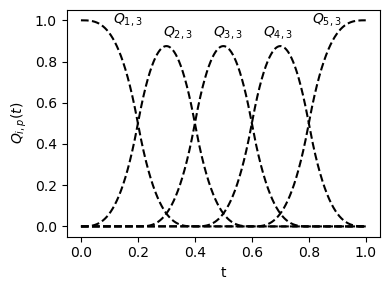

In [5]:
xx = np.linspace(0,1,10000)




# for i in range(n_bins):
#     plt.plot(xx, func1(xx,t,i,n_bins))


n_bins = 5
M = n_bins
p = 3
t = np.linspace(0,1,n_bins + 1)

fig,ax = plt.subplots(1,1, figsize = (4,3))
for i in range(n_bins):
    spl = func1(xx,t,i,n_bins, p)
    plt.plot(xx, spl  , "black", linestyle = "dashed")
    # plt.plot(x, spline, "black", linestyle = "dashed")
    label = r"$" + "Q_{" + f"{i+1},{p}" + "}" + r"$"
    x_an = i/(M) + 1/(4*M) + (M/2 - i) / (8*M)
    y_an = spl[np.where(i/(M)+0.1 > xx)[0][-1]]  + 0.05
    ax.annotate(label, (x_an, y_an))

ax.set_xlabel("t")
ax.set_ylabel(r"$Q_{i,p}\left(t\right)$")
fig.tight_layout()

# plt.savefig(figures_path + "MI estimation/Q-spline basis functions - degree 3.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/Q-spline basis functions - degree 3", bbox_inches='tight')

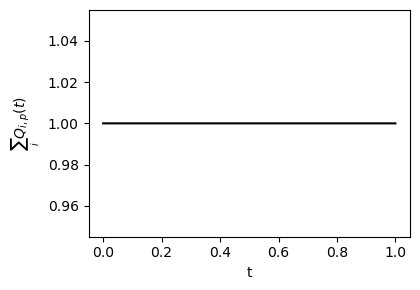

In [6]:
# n_bins = 5

# M = n_bins
# p = 3

# t = knots(p+1,M)
# x = np.linspace(0,1,100000)
# z_transformer = z_from_x(x,M,p)



res = np.vstack( [func1(xx,t,i,n_bins, p) for i in range(M)] )

fig,ax = plt.subplots(1,1, figsize = (4.3,3))
ax.plot( xx, res.sum(axis = 0), "black")
# ax.vlines(np.linspace(0,1,n_bins+1), 0, res.mean(axis = 1).max(), colors='w')
ax.set_xlabel("t")
ax.set_ylabel(r"$\sum_{i} Q_{i,p}\left(t\right)$")
# # ax.set_xticks(np.linspace(1,n_bins, n_bins) / n_bins - 1 / (2 * n_bins))
# # ax.set_xticklabels([i+1 for i in range(n_bins)])
fig.tight_layout()

# plt.savefig(figures_path + "MI estimation/Q-spline coefficient sum - degree 3.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/Q-spline coefficient sum - degree 3", bbox_inches='tight')

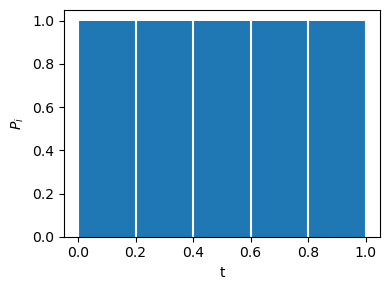

In [8]:
# n_bins = 5

# M = n_bins
# p = 3

# t = knots(p+1,M)
# x = np.linspace(0,1,100000)
# z_transformer = z_from_x(x,M,p)



res = np.vstack( [func1(xx,t,i,n_bins, p) for i in range(M)] )

fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.stairs(res.mean(axis = 1) * n_bins, np.linspace(0,1,n_bins+1), fill=True)
ax.vlines(np.linspace(0,1,n_bins+1), 0, res.mean(axis = 1).max() * n_bins, colors='w')
ax.set_xlabel("t")
ax.set_ylabel(r"$P_i$")
# ax.set_xticks(np.linspace(1,n_bins, n_bins) / n_bins - 1 / (2 * n_bins))
# ax.set_xticklabels([i+1 for i in range(n_bins)])
fig.tight_layout()

# plt.savefig(figures_path + "MI estimation/Q-spline marginal dist - degree 3.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/Q-spline marginal dist - degree 3", bbox_inches='tight')

In [11]:
rho = 0.4
data = scipy.stats.multivariate_normal.rvs(mean = None, cov = np.array([[1,rho],[rho,1]]), size = 100)

px
Hx : -2.078902372217196
py
Hy : -2.078902372217196
pxy
Hxy : -3.9850165874363688
all done
0.1727881569980232
0.0871766935723889


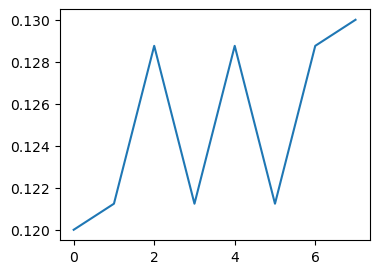

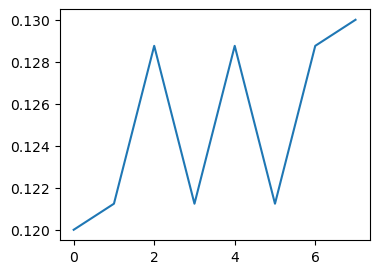

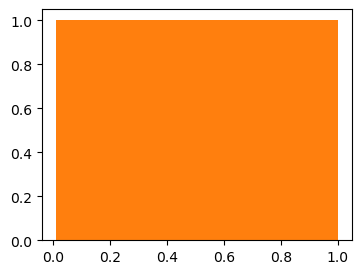

In [12]:


x = data[:,0]
# y = (0.3 * data[:,1])**3
y = data[:,1]


x = scipy.stats.ecdf(x.copy()).cdf.evaluate(x)
y = scipy.stats.ecdf(y.copy()).cdf.evaluate(y)


# x = x / x.var()**0.5
# y = y / (np.quantile(y, 0.975) - np.quantile(y, 0.025))



# idx = np.abs(y) < 0.005

# x = x[idx]
# y = y[idx]

n_bins = 8
M = n_bins
p = 3
t = np.linspace(0,1,n_bins + 1)


print("px")
px_kernel = np.vstack( [func1(x,t,i,n_bins, p) for i in range(M)] )
px = px_kernel.mean(axis = 1)
px_nonnull = px[px > 0]
print(f"Hx : {(px_nonnull*np.log(px_nonnull)).sum()}")

print("py")
py_kernel = np.vstack( [func1(y,t,i,n_bins, p) for i in range(M)] )
py = py_kernel.mean(axis = 1)
py_nonnull = py[py > 0]
print(f"Hy : {(py_nonnull*np.log(py_nonnull)).sum()}")


print("pxy")
# pxy_kernel = py_kernel[:,None,:] * px_kernel[None,:,:]
# pxy = (pxy_kernel).mean(axis = 2)
pxy = py_kernel @ px_kernel.T / py_kernel.shape[1]
pxy_nonnull = pxy[pxy > 0]
print(f"Hxy : {(pxy_nonnull * np.log(pxy_nonnull)).sum()}")

print("all done")
# print(f"xy: {(pxy_nonnull * np.log(pxy_nonnull)).sum()}")
print( (pxy_nonnull * np.log(pxy_nonnull)).sum() - (px_nonnull*np.log(px_nonnull)).sum() - (py_nonnull * np.log(py_nonnull)).sum() )
 
# pa = np.vstack([Bx(z_transformer_x(x),p,i,t) for i in range(-1,M)]).mean(axis = 1)
# py = np.vstack([Bx(z_transformer_y(x),p,i,t) for i in range(-1,M)]).mean(axis = 1)

# idx_non_zero = pa != 0

# centers = (np.linspace(0,n_bins+1,n_bins+1) / (n_bins+1))[:-1] + 1 / (2 * (n_bins))
# plt.scatter(centers,pa)

# H = - (pa[idx_non_zero] * np.log(pa[idx_non_zero])).sum()
# print(H)


# print(0.5 * np.log(2 * np.pi * np.exp(1)))

print(-0.5 * np.log(1 - rho**2))


hist = np.histogram2d(x, y, bins = n_bins)
xx_hist, yy_hist = np.meshgrid((hist[1][1:] + hist[1][:-1])/2, (hist[2][1:] + hist[2][:-1])/2)



levels = np.linspace(0, np.max( [hist[0].max() / y.__len__(), pxy.max()] ), 20)
levels = levels.max() * (levels/levels.max())**3

dx = hist[1][1] - hist[1][0]
dy = hist[2][1] - hist[2][0]








fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(py_kernel.mean(axis = 1))


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(px_kernel.mean(axis = 1))


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.hist(x, bins = 100)
plt.hist(y, bins = 100);
# plt.show()

# fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.hist2d(x, y, bins = n_bins);


# # plt.matshow(pxy, origin = "lower")
# fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.imshow(pxy, origin = "lower", extent=[x.min(),x.max(), y.min(), y.max()], aspect='auto')

# 8, 100
# 15, 1000
# 28, 10.000

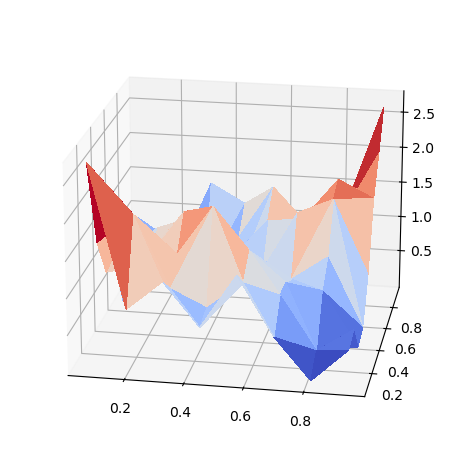

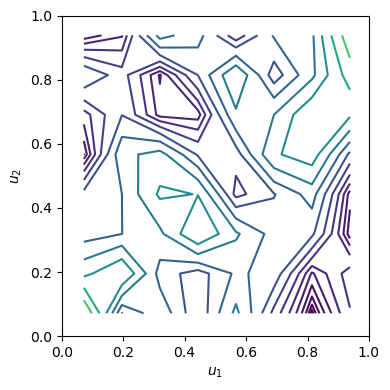

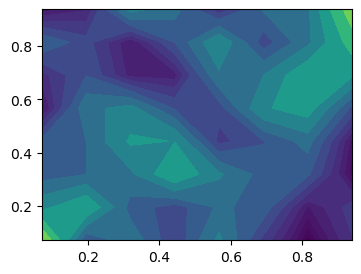

In [22]:
# B-Spline approximation

# 3d plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(xx_hist.ravel(), yy_hist.ravel(), pxy.ravel() / (dx*dy) , cmap=cm.coolwarm ,linewidth=0.2, antialiased=False)
# ax.set_zlim(0 , 35)
ax.view_init(20, -80, 0)
fig.tight_layout()


# contour plot
fig, ax = plt.subplots(1,1, figsize=(4,4))
res = ax.contour(xx_hist, yy_hist, pxy / (dx*dy),levels = levels / (dx*dy))
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.tight_layout()


# contour plot 2
fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.contourf(xx_hist,yy_hist, pxy, vmax = levels[-1], levels = levels)

In [65]:
px_kernel.shape

(5, 10000)

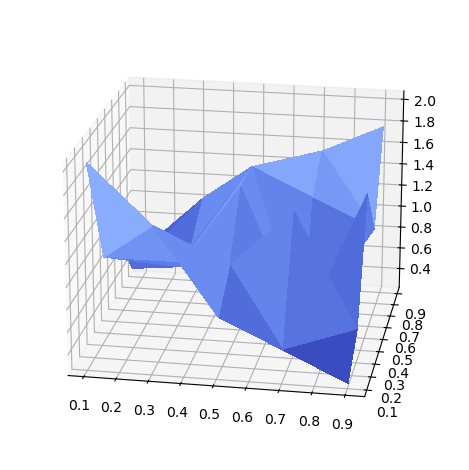

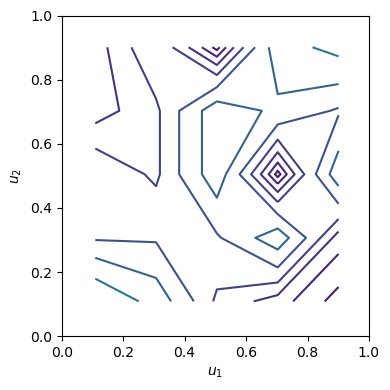

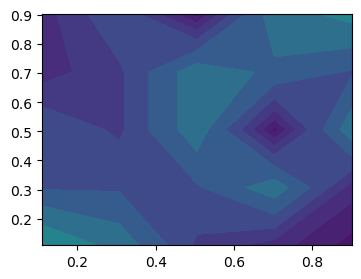

In [55]:
# emperical distribution

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(xx_hist.ravel(),yy_hist.ravel(), hist[0].T.ravel()/ y.__len__() / (dx * dy), cmap=cm.coolwarm ,linewidth=0.2, antialiased=False, vmax = 5)
# ax.set_zlim(0 , 35)
ax.view_init(20, -80, 0)
fig.tight_layout()



# contour plot
fig, ax = plt.subplots(1,1, figsize=(4,4))
res = ax.contour(xx_hist, yy_hist, hist[0].T / y.__len__() / (dx*dy),levels = levels / (dx*dy))
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.tight_layout()


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.contourf(xx_hist,yy_hist, hist[0].T/ y.__len__(), vmax = levels[-1], levels = levels)
